In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('precision', 2)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
def printDataFrameDetails(df):
  print(df.info())
  print(df.describe())
  missing_percentage = (df.isnull().sum()*100)/len(df)
  print("--------------> Missing Percentage In Each Columns <---------------------------")
  print(missing_percentage.reset_index(-1))
  print("--------------> Percentage of unique rows in each columns <---------------------------")
  print(df.nunique()*100/len(df))


In [ ]:
def plotCategoryBasedOnSurvivalRate(df,cat,ax):
    result = df.groupby(cat)['Survived'].mean().reset_index(-1)
    sns.barplot(x = cat,y="Survived",data = result,ax=ax)


In [ ]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

def plotCategoryDivision(df,cat,ax):
  ax.set_title("Ratio of distribution for category "+cat)
  result = train.groupby(cat)['PassengerId'].count().reset_index(-1)
  result.plot.pie(y="PassengerId",labels=result[cat],autopct=lambda pct: func(pct, result['PassengerId']),ax=ax)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv') 
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv') 

final_test = test.copy()

In [ ]:
print(final_test.shape)
print(train.shape)


(418, 11)
(891, 12)


In [ ]:
printDataFrameDetails(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count       891.00    891.00  891.00 714.00 891.00 891.00 891.00
mean        446.00      0.38    2.31  29.70   0.52   0.38  32.20
std         257.35      0.49    0.84  14.53 

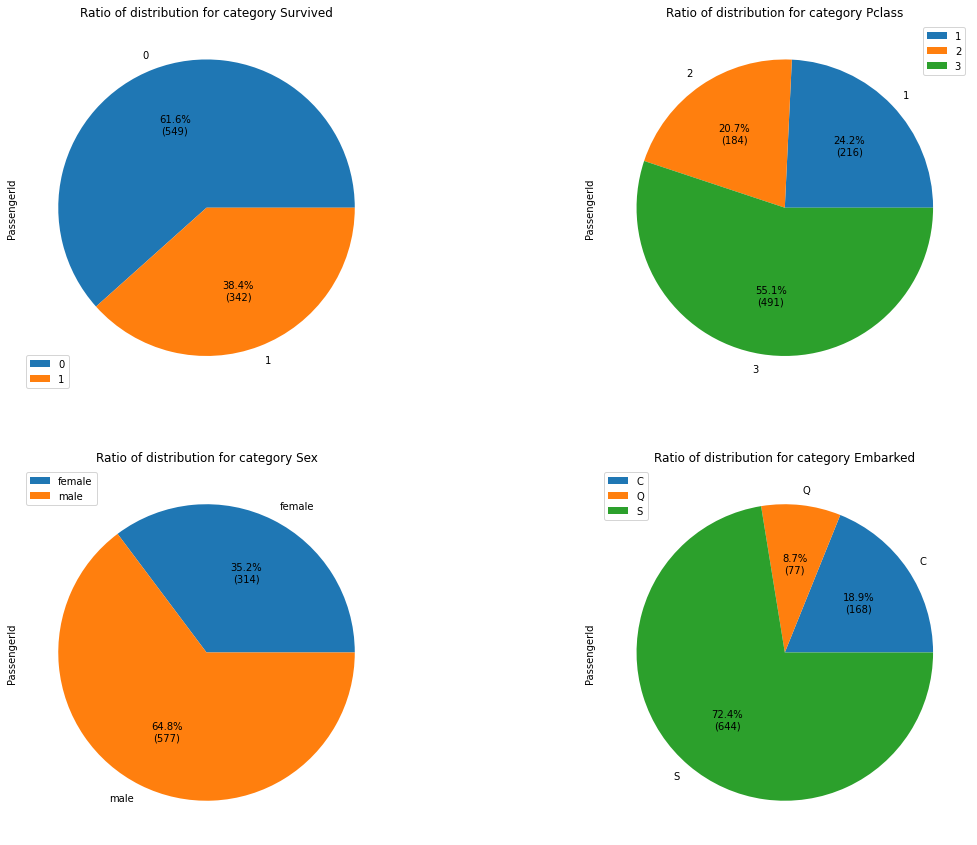

In [ ]:
fig , axs = plt.subplots(2,2,figsize=(19,15))
plotCategoryDivision(train,'Survived',axs[0][0])
plotCategoryDivision(train,'Pclass',axs[0][1])
plotCategoryDivision(train,'Sex',axs[1][0])
plotCategoryDivision(train,'Embarked',axs[1][1])

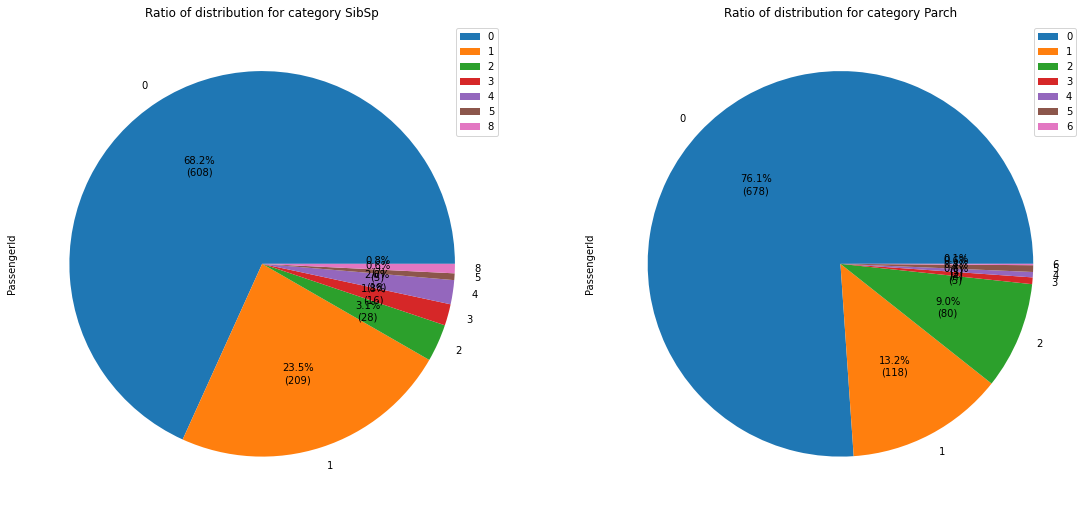

In [ ]:
fig , axs = plt.subplots(1,2,figsize=(19,11))
plotCategoryDivision(train,"SibSp",axs[0])
plotCategoryDivision(train,"Parch",axs[1])

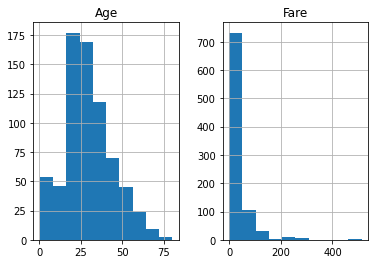

In [ ]:
train[["Age","Fare"]].hist()
plt.show()

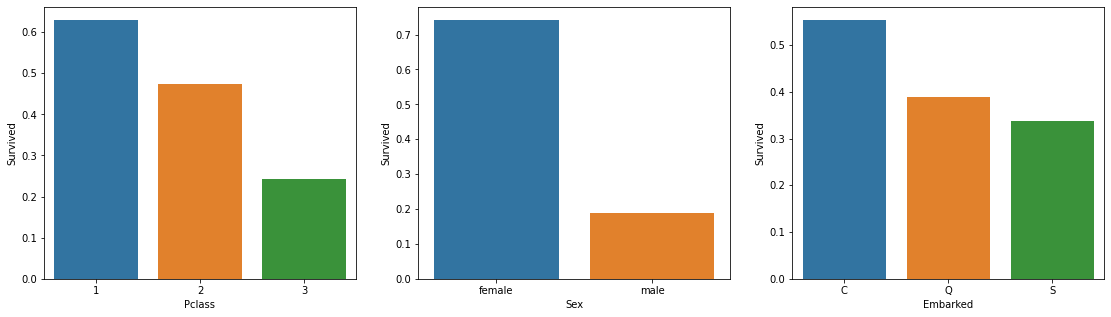

In [ ]:
fig , axs = plt.subplots(1,3,figsize=(19,5))

plotCategoryBasedOnSurvivalRate(train,'Pclass',axs[0])
plotCategoryBasedOnSurvivalRate(train,'Sex',axs[1])
plotCategoryBasedOnSurvivalRate(train,'Embarked',axs[2])


In [ ]:
group = train.groupby('Cabin')
# df = group['PassengerId'].count().reset_index(-1)
# df['Survived'] = group['Survived'].mean()
res = group['Survived'].mean()
df = pd.DataFrame()
df['Survived'] = res

res2 = group['PassengerId'].count() 
df['Passenger'] = res2

res3 = group['Fare'].mean() 
df['Passenger'] = res2
df['Fare'] = res3


df


,Survived,Passenger,Fare
Cabin,,,
A10,0.00,1,40.12
A14,0.00,1,52.00
A16,1.00,1,39.60
A19,0.00,1,26.00
A20,1.00,1,56.93
A23,1.00,1,30.00
A24,0.00,1,50.50
A26,1.00,1,35.50
A31,1.00,1,31.00


In [ ]:
train['Cabin'].fillna('U',inplace=True)

In [ ]:
train['Cabin_Code'] = train['Cabin'].str.slice(start=0,stop=1)

In [ ]:
train = train.drop('Cabin',axis=1)

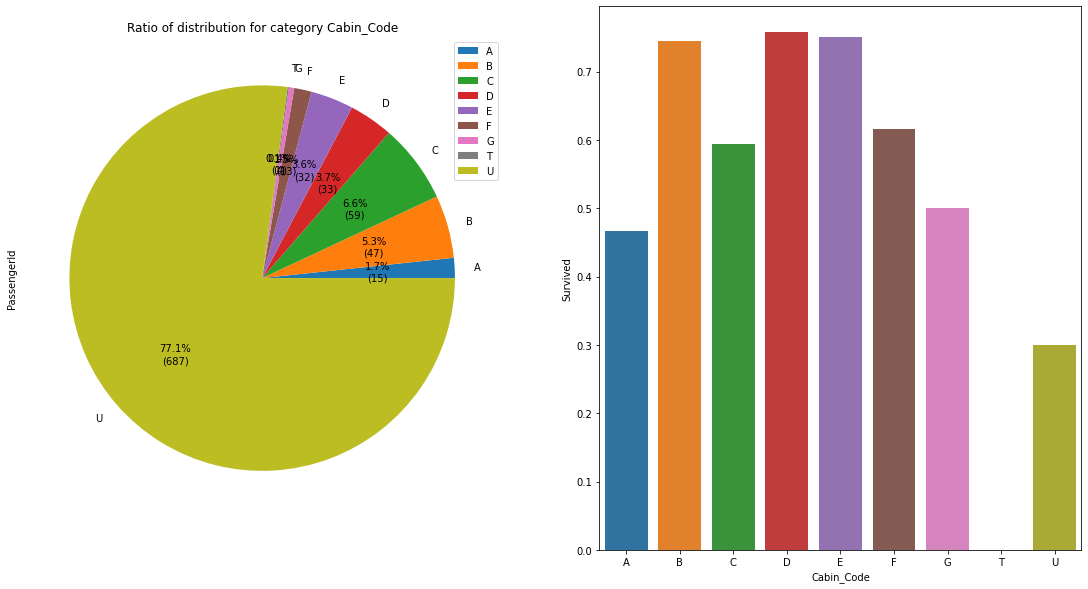

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(19,10))

plotCategoryDivision(train,"Cabin_Code",ax[0])
plotCategoryBasedOnSurvivalRate(train,"Cabin_Code",ax[1])

In [ ]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Don               1
Capt              1
Ms                1
the Countess      1
Sir               1
Jonkheer          1
Mme               1
Name: Title, dtype: int64

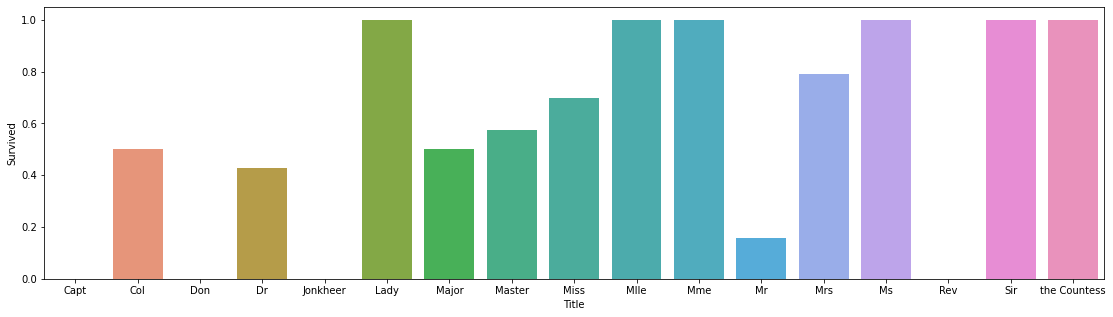

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(19,5))
plotCategoryBasedOnSurvivalRate(train,"Title",ax)

In [ ]:
train["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Don               1
Capt              1
Ms                1
the Countess      1
Sir               1
Jonkheer          1
Mme               1
Name: Title, dtype: int64

In [ ]:
title_map = {
    "Capt":"Staff",
    "Col":"Officer",
    "Major":"Officer",
    "Dr": "Officer",
    "Don":"Officer",
    "Miss Title":"Ms",
    "Lady": "Royalty",
    "Mlle":"Royalty",
    "Mme": "Royalty",
    "Rev": "Staff",
    "Sir":"Royalty",
    "the Countess":"Royalty",
    "Jonkheer":"Royalty",
    "Master":"Master",
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Ms":"Miss",
    "Miss":"Miss",
    "Dona":"Royalty"
}


In [ ]:
train["Title_Cat"] = train['Title'].map(title_map)

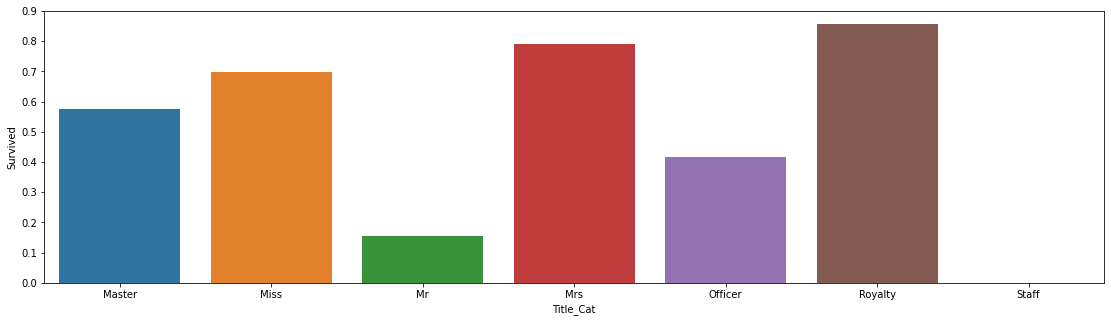

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(19,5))
plotCategoryBasedOnSurvivalRate(train,"Title_Cat",ax)

In [ ]:
train = train.drop('Title',axis=1)

In [ ]:
train_sub = train[~train['Age'].isnull()]
df = train_sub.groupby('Title_Cat')["Age"].median().reset_index(-1)
df

,Title_Cat,Age
0,Master,3.50
1,Miss,21.00
2,Mr,30.00
3,Mrs,35.00
4,Officer,49.00
5,Royalty,33.00
6,Staff,51.00


In [ ]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Code,Title_Cat
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.46,Q,U,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,nan,0,0,244373,13.00,S,U,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,nan,0,0,2649,7.22,C,U,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,nan,0,0,2631,7.22,C,U,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,nan,0,0,330959,7.88,Q,U,Miss
29,30,0,3,"Todoroff, Mr. Lalio",male,nan,0,0,349216,7.90,S,U,Mr
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,nan,1,0,PC 17569,146.52,C,B,Mrs
32,33,1,3,"Glynn, Miss. Mary Agatha",female,nan,0,0,335677,7.75,Q,U,Miss
36,37,1,3,"Mamee, Mr. Hanna",male,nan,0,0,2677,7.23,C,U,Mr
42,43,0,3,"Kraeff, Mr. Theodor",male,nan,0,0,349253,7.90,C,U,Mr


In [ ]:
def getMedianAge(cat):
  return df[df['Title_Cat'] == cat].iloc[0]['Age']

def f1(row):
  if ~np.isnan(row['Age']):
    return row['Age']
  else:
    return getMedianAge(row['Title_Cat'])

train['Age'] = train.apply(f1,axis=1)



In [ ]:
# printDataFrameDetails(train)
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode())

In [ ]:
mode = train['Embarked'].mode()
print(mode[0])

S


In [ ]:
train['Embarked'].fillna(value=mode[0],inplace=True)

In [ ]:
# printDataFrameDetails(test)
final_test['Title'] = final_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
final_test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [ ]:
final_test["Title_Cat"] = final_test['Title'].map(title_map)

In [ ]:
final_test['Cabin'].fillna('U',inplace=True)

In [ ]:
final_test['Cabin_Code'] = final_test['Cabin'].str.slice(start=0,stop=1)

In [ ]:
final_test[test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Cat,Cabin_Code
10,902,3,"Ilieff, Mr. Ylio",male,nan,0,0,349220,7.90,U,S,Mr,Mr,U
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,nan,0,0,PC 17598,31.68,U,S,Mrs,Mrs,U
29,921,3,"Samaan, Mr. Elias",male,nan,2,0,2662,21.68,U,C,Mr,Mr,U
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,nan,1,2,W./C. 6607,23.45,U,S,Mrs,Mrs,U
36,928,3,"Roth, Miss. Sarah A",female,nan,0,0,342712,8.05,U,S,Miss,Miss,U
39,931,3,"Hee, Mr. Ling",male,nan,0,0,1601,56.50,U,S,Mr,Mr,U
41,933,1,"Franklin, Mr. Thomas Parham",male,nan,0,0,113778,26.55,D34,S,Mr,Mr,D
47,939,3,"Shaughnessy, Mr. Patrick",male,nan,0,0,370374,7.75,U,Q,Mr,Mr,U
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,nan,0,0,SC/A.3 2861,15.58,U,C,Mr,Mr,U
58,950,3,"Davison, Mr. Thomas Henry",male,nan,1,0,386525,16.10,U,S,Mr,Mr,U


In [ ]:
final_test['Age'] = final_test.apply(f1,axis=1)

In [ ]:
faredf = train.groupby('Pclass')['Fare'].mean().reset_index(-1)
faredf

,Pclass,Fare
0,1,84.15
1,2,20.66
2,3,13.68


In [ ]:
def getMedianFare(cls):
  return faredf[faredf['Pclass'] == cls].iloc[0]['Fare']

def f1(row):
  if ~np.isnan(row['Fare']):
    return row['Fare']
  else:
    return getMedianFare(row['Pclass'])

final_test['Fare'] = final_test.apply(f1,axis=1)

In [ ]:
printDataFrameDetails(train)
train = train.drop(['PassengerId','Name','Ticket'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Cabin_Code   891 non-null    object 
 12  Title_Cat    891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None
       PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count       891.00    891.00  891.00 891.00 891.00 891.00 891.00
mean        446.00      0.38    2.31  29.39   0.52   0.38  32.20
st

In [ ]:
printDataFrameDetails(final_test)
final_test = final_test.drop(['PassengerId','Name','Title','Cabin','Ticket'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
 12  Title_Cat    418 non-null    object 
 13  Cabin_Code   418 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 45.8+ KB
None
       PassengerId  Pclass    Age  SibSp  Parch   Fare
count       418.00  418.00 418.00 418.00 418.00 418.00
mean      1,100.50    2.27  29.76   0.45   0.

In [ ]:
final_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Cat,Cabin_Code
0,3,male,34.50,0,0,7.83,Q,Mr,U
1,3,female,47.00,1,0,7.00,S,Mrs,U
2,2,male,62.00,0,0,9.69,Q,Mr,U
3,3,male,27.00,0,0,8.66,S,Mr,U
4,3,female,22.00,1,1,12.29,S,Mrs,U


In [ ]:
train.describe(percentiles=[.01,.05,0.1,.25,.5,.75,.9,.95,.98,.99])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,29.39,0.52,0.38,32.20
std,0.49,0.84,13.27,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
1%,0.00,1.00,1.00,0.00,0.00,0.00
5%,0.00,1.00,5.00,0.00,0.00,7.22
10%,0.00,1.00,16.00,0.00,0.00,7.55
25%,0.00,2.00,21.00,0.00,0.00,7.91
50%,0.00,3.00,30.00,0.00,0.00,14.45
75%,1.00,3.00,35.00,1.00,0.00,31.00


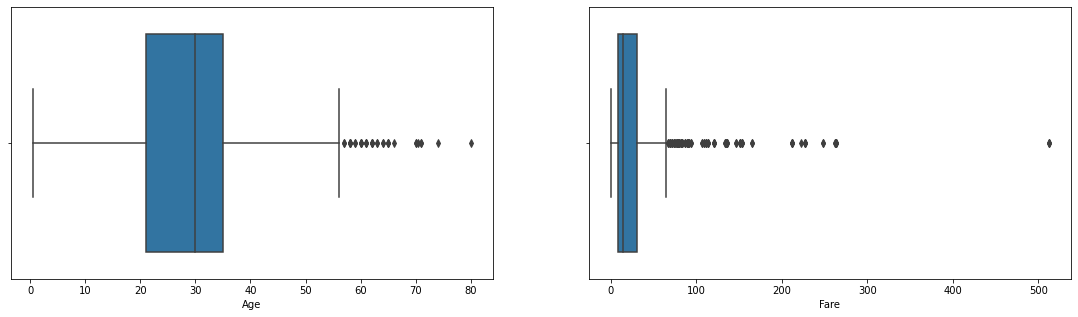

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(19,5))
sns.boxplot(x=train['Age'],ax=axs[0])
sns.boxplot(x=train['Fare'],ax=axs[1])

In [ ]:
ageQuantile = train.Age.quantile(.99)
train = train[train['Age'] <= ageQuantile]

In [ ]:


fareQuantile = train.Fare.quantile(.99)
train = train[train['Fare'] <= fareQuantile]

In [ ]:
train.describe(percentiles=[.01,.05,0.1,.25,.5,.75,.9,.95,.98,.99])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,874.00,874.00,874.00,874.00,874.00,874.00
mean,0.38,2.33,29.00,0.52,0.37,29.01
std,0.49,0.83,12.69,1.10,0.79,36.68
min,0.00,1.00,0.42,0.00,0.00,0.00
1%,0.00,1.00,1.00,0.00,0.00,0.00
5%,0.00,1.00,4.65,0.00,0.00,7.22
10%,0.00,1.00,16.00,0.00,0.00,7.53
25%,0.00,2.00,21.00,0.00,0.00,7.90
50%,0.00,3.00,30.00,0.00,0.00,14.45
75%,1.00,3.00,35.00,1.00,0.00,30.50


### Convert categorical to one hot encoded

In [ ]:
# Convert all category columns into dummies
cat_cols = train.select_dtypes(include=['object'])
category_columns = pd.get_dummies(cat_cols,drop_first=True)
train = train.drop(cat_cols.columns,axis=1)
train = pd.concat([train,category_columns],axis = 1)

In [ ]:
# Convert all category columns into dummies
cat_cols = final_test.select_dtypes(include=['object'])
category_columns = pd.get_dummies(cat_cols,drop_first=True)
final_test = final_test.drop(cat_cols.columns,axis=1)
final_test = pd.concat([final_test,category_columns],axis = 1)

In [ ]:
# Get missing columns in the training test
# print(X_train["Foundation"])
missing_cols = set( train.columns ) - set( final_test.columns )
print(missing_cols)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    final_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
final_test = final_test[train.columns]

{'Cabin_Code_T', 'Survived'}


In [ ]:
final_test = final_test.drop('Survived',axis=1)

### Split into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train.drop('Survived',axis=1)
y = train['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

### Feature Scaling

In [ ]:
 from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
cols = X_train.columns

X_train_scaled = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train_scaled,columns = cols)

X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_Code_B,Cabin_Code_C,Cabin_Code_D,Cabin_Code_E,Cabin_Code_F,Cabin_Code_G,Cabin_Code_T,Cabin_Code_U,Title_Cat_Miss,Title_Cat_Mr,Title_Cat_Mrs,Title_Cat_Officer,Title_Cat_Royalty,Title_Cat_Staff
0,0.50,0.44,0.12,0.00,0.08,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
1,0.00,0.75,0.12,0.00,0.23,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.50,0.77,0.00,0.17,0.11,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
3,0.50,0.63,0.00,0.17,0.08,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
4,0.00,0.94,0.00,0.00,0.14,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [ ]:
cols = X_train.columns

X_test_scaled = scaler.transform(X_test)

X_test = pd.DataFrame(X_test_scaled,columns = cols)

X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_Code_B,Cabin_Code_C,Cabin_Code_D,Cabin_Code_E,Cabin_Code_F,Cabin_Code_G,Cabin_Code_T,Cabin_Code_U,Title_Cat_Miss,Title_Cat_Mr,Title_Cat_Mrs,Title_Cat_Officer,Title_Cat_Royalty,Title_Cat_Staff
0,0.50,0.46,0.12,0.00,0.10,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
1,1.00,0.46,0.00,0.00,0.03,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
2,1.00,0.27,0.00,0.00,0.03,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
3,1.00,0.32,0.00,0.00,0.03,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.74,0.12,0.00,0.21,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [ ]:
cols = X_train.columns

final_test_scaled = scaler.transform(final_test)

final_test = pd.DataFrame(final_test_scaled,columns = cols)

final_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_Code_B,Cabin_Code_C,Cabin_Code_D,Cabin_Code_E,Cabin_Code_F,Cabin_Code_G,Cabin_Code_T,Cabin_Code_U,Title_Cat_Miss,Title_Cat_Mr,Title_Cat_Mrs,Title_Cat_Officer,Title_Cat_Royalty,Title_Cat_Staff
0,1.00,0.53,0.00,0.00,0.03,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
1,1.00,0.72,0.12,0.00,0.03,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0.50,0.95,0.00,0.00,0.04,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
3,1.00,0.41,0.00,0.00,0.03,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
4,1.00,0.33,0.12,0.17,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00


### Common method to Fit any type of model

In [ ]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

def printModelStats(y_true,y_pred):
  print("Accuracy ::",metrics.accuracy_score(y_true,y_pred))
  print("Recall:::",metrics.recall_score(y_true,y_pred))
  print("ROC AUC Score::::",metrics.roc_auc_score(y_true,y_pred))

def FitModel(model,model_name,params=None):
  result  = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',n_jobs=-1,cv=5)
  result.fit(X_train,y_train)
  print(result.best_params_)
  y_train_pred = result.predict(X_train)
  print("--------> Model performance on train data <----------")
  printModelStats(y_train,y_train_pred)
  y_test_pred = result.predict(X_test)
  print("--------> Model performance on test data <----------")
  printModelStats(y_test,y_test_pred)
  return result
 

### Simple logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

result = FitModel(model,"Logistic regression",{"penalty":['l1','l2','elasticnet'],'C':np.logspace(0,4,10),'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']})

{'C': 7.742636826811269, 'penalty': 'l2', 'solver': 'newton-cg'}
--------> Model performance on train data <----------
Accuracy :: 0.8351145038167939
Recall::: 0.776
ROC AUC Score:::: 0.8238024691358024
--------> Model performance on test data <----------
Accuracy :: 0.8310502283105022
Recall::: 0.75
ROC AUC Score:::: 0.8157407407407408


### Using Simple Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param = { 'splitter':['best','random'],'max_depth':[3,5,7,10],'min_samples_leaf':[1,3,5]}

model = DecisionTreeClassifier()
FitModel(model,"Decision Tree",param)

{'max_depth': 5, 'min_samples_leaf': 1, 'splitter': 'best'}
--------> Model performance on train data <----------
Accuracy :: 0.8610687022900764
Recall::: 0.828
ROC AUC Score:::: 0.8547407407407408
--------> Model performance on test data <----------
Accuracy :: 0.8447488584474886
Recall::: 0.7261904761904762
ROC AUC Score:::: 0.8223544973544974


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'm

### Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

params = {'n_estimators':[10,30,50,100]}

FitModel(model,"Random forest",params)

{'n_estimators': 10}
--------> Model performance on train data <----------
Accuracy :: 0.9648854961832061
Recall::: 0.932
ROC AUC Score:::: 0.9585925925925926
--------> Model performance on test data <----------
Accuracy :: 0.821917808219178
Recall::: 0.7142857142857143
ROC AUC Score:::: 0.8015873015873016


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

### Using SVM

In [ ]:
from sklearn.svm import SVC

model = SVC()

# params = { 'C': np.logspace(0,4,10),'kernel':['linear','poly','rbf','sigmoid'],'degree':[1,2,3]}

params = {'kernel':['linear','rbf']}

FitModel(model,"SVM Model",params)

{'kernel': 'rbf'}
--------> Model performance on train data <----------
Accuracy :: 0.8488023952095808
Recall::: 0.71484375
ROC AUC Score:::: 0.8234412924757282
--------> Model performance on test data <----------
Accuracy :: 0.7937219730941704
Recall::: 0.6627906976744186
ROC AUC Score:::: 0.7693515532167713


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'kernel': ['linear', 'rbf']}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [ ]:
from xgboost import XGBClassifier

params = {'n_estimators':[10,50,100,200,300,500]}
result = FitModel(XGBClassifier() , 'XGBoost',params )
# printModelStats(result)

{'n_estimators': 300}
--------> Model performance on train data <----------
Accuracy :: 0.9266467065868264
Recall::: 0.8671875
ROC AUC Score:::: 0.9153898665048543
--------> Model performance on test data <----------
Accuracy :: 0.7982062780269058
Recall::: 0.6627906976744186
ROC AUC Score:::: 0.7730011882532677


In [ ]:
test['Survived'] = result.predict(final_test)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S,1


In [ ]:
test[['PassengerId','Survived']].to_csv("final_submission.csv",index=False)

In [ ]:
test['Survived'].value_counts()

0    273
1    145
Name: Survived, dtype: int64